In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14,7]

Text(0.5, 1.0, 'GRAY')

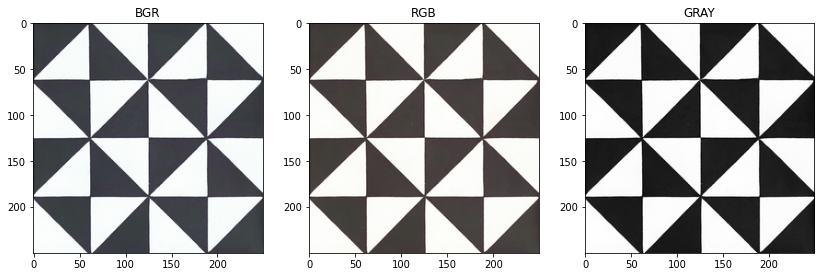

In [2]:
bgr = cv2.imread('images/triangle_tile.jpeg')
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(bgr,cv2.COLOR_BGR2GRAY)
f,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(bgr)
ax1.set_title('BGR')
ax2.imshow(rgb)
ax2.set_title('RGB')
ax3.imshow(gray,cmap='gray')
ax3.set_title('GRAY')

`cv2.HOGDescriptor(win_size = (64, 128),  
                  block_size = (16, 16),  
                  block_stride = (8, 8),  
                  cell_size = (8, 8),  
                  nbins = 9,  
                  win_sigma = DEFAULT_WIN_SIGMA,  
                  threshold_L2hys = 0.2,  
                  gamma_correction = true,  
                  nlevels = DEFAULT_NLEVELS)`
                  
1. win_size – Size
Size of detection window in pixels (width, height). Defines the region of interest. Must be an integer multiple of cell size.
2. block_size – Size
Block size in pixels (width, height). Defines how many cells are in each block. Must be an integer multiple of cell size and it must be smaller than the detection window. The smaller the block the finer detail you will get.
3. block_stride – Size
Block stride in pixels (horizontal, vertical). It must be an integer multiple of cell size. The block_stride defines the distance between adjecent blocks, for example, 8 pixels horizontally and 8 pixels vertically. Longer block_strides makes the algorithm run faster (because less blocks are evaluated) but the algorithm may not perform as well.
4. cell_size – Size
Cell size in pixels (width, height). Determines the size fo your cell. The smaller the cell the finer detail you will get.
4. nbins – int
Number of bins for the histograms. Determines the number of angular bins used to make the histograms. With more bins you capture more gradient directions. HOG uses unsigned gradients, so the angular bins will have values between 0 and 180 degrees.
5. win_sigma – double
Gaussian smoothing window parameter. The performance of the HOG algorithm can be improved by smoothing the pixels near the edges of the blocks by applying a Gaussian spatial window to each pixel before computing the histograms.

In [4]:
# for our example we will use cv2.HOGDescriptor for getting the descriptors and the values we'll change are 
# cell size, block size, block stride, number of bins - remaining parameters can be left unchanged

cell_size = (6,6)
no_cells_per_block = (2,2)
block_size = (no_cells_per_block[0]*cell_size[0],
              no_cells_per_block[1]*cell_size[1])

# cell size and block size should be less than window size and default window size is 64,128

# calculate number of cells that fit in x and y direction
x_cells = gray.shape[1]//cell_size[0]
y_cells = gray.shape[0]//cell_size[1]

h_stride,v_stride  = 1,1

block_stride = (cell_size[0]*h_stride,cell_size[1]*v_stride)

# no of bins
n_bins = 9

win_size = (x_cells*cell_size[0],y_cells*cell_size[1])

print('Hog Descriptor Parameters are: ')
print(f'Win Size = {win_size}')
print(f'Block Size = {block_size}')
print(f'Cell Size = {cell_size}')
print(f'Block Stride = {block_stride}')
print(f'Number of bins = {n_bins}')

Hog Descriptor Parameters are: 
Win Size = (246, 246)
Block Size = (12, 12)
Cell Size = (6, 6)
Block Stride = (6, 6)
Number of bins = 9


In [5]:
hog = cv2.HOGDescriptor(win_size,block_size,block_stride,cell_size,n_bins)
hog_descriptor = hog.compute(gray)

The resulting hog descriptor(feature vector) - contains normalized histograms for all cells of all blocks in the detection window concaneted in one long vector.
Size of feature vector will be product of `# blocks` * `# cells` * `# bins`

if `block stride` = `block size` then `# blocks` in the window = window size/block size
in any other case of overlapping windows - 

<span class="mathquill">
\begin{equation}
\mbox{Total}_i = \left( \frac{\mbox{block_size}_i}{\mbox{block_stride}_i} \right)\left( \frac{\mbox{window_size}_i}{\mbox{block_size}_i} \right) - \left [\left( \frac{\mbox{block_size}_i}{\mbox{block_stride}_i} \right) - 1 \right]; \mbox{  for  } i = x,y
\end{equation}
</span>

Where Total 𝑥 , is the total number of blocks along the width of the detection window, and
Total 𝑦 , is the total number of blocks along the height of the detection window. 

Total # blocks in the window = Total𝑥*Total𝑦

The above formula can be simplified considerably because the `block_size`, `block_stride`, and `window_sizeare` all defined in terms of the `cell_size`. By making all the appropriate substitutions and cancelations the above formula reduces to:

<span class="mathquill">
\begin{equation}
\mbox{Total}_i = \left(\frac{\mbox{cells}_i - \mbox{num_cells_per_block}_i}{N_i}\right) + 1\mbox{  }; \mbox{  for  } i = x,y
\end{equation}
</span>

Where <span class="mathquill">cells$_x$</span> is the total number of cells along the width of the detection window, and <span class="mathquill">cells$_y$</span>, is the total number of cells along the height of the detection window. And <span class="mathquill">$N_x$</span> is the horizontal block stride in units of `cell_size` and <span class="mathquill">$N_y$</span> is the vertical block stride in units of `cell_size`. 

Let's calculate what the number of elements for the HOG feature vector should be and check that it matches the shape of the HOG Descriptor calculated above.

In [12]:
total_block_x = np.uint32(((x_cells-no_cells_per_block[0])/h_stride)+1)
total_block_y = np.uint32(((y_cells-no_cells_per_block[1])/v_stride)+1)

total_elements_in_hog_descripter = (total_block_x)*(total_block_y)*no_cells_per_block[0]*no_cells_per_block[1]*n_bins

print('Total elements in HOG Descriptor we calculated are :',total_elements_in_hog_descripter)
print('Total elements present in HOG Descriptor calculated by instance of HOG Descriptor class :',hog_descriptor.shape)

Total elements in HOG Descriptor we calculated are : 57600
Total elements present in HOG Descriptor calculated by instance of HOG Descriptor class : (57600,)


In [ ]:
%matplotlib notebook

import copy
import matplotlib.patches as patches

# Set the default figure size
plt.rcParams['figure.figsize'] = [9.8, 9]


# Reshape the feature vector to [blocks_y, blocks_x, num_cells_per_block_x, num_cells_per_block_y, num_bins].
# The blocks_x and blocks_y will be transposed so that the first index (blocks_y) referes to the row number
# and the second index to the column number. This will be useful later when we plot the feature vector, so
# that the feature vector indexing matches the image indexing.
hog_descriptor_reshaped = hog_descriptor.reshape(total_block_x,
                                                 total_block_y,
                                                 num_cells_per_block[0],
                                                 num_cells_per_block[1],
                                                 n_bins).transpose((1, 0, 2, 3, 4))

print('The feature vector has shape:', hog_descriptor.shape)

# Print the reshaped feature vector
print('The reshaped feature vector has shape:', hog_descriptor_reshaped.shape)

ave_grad = np.zeros((y_cells, x_cells, n_bins))

# Print the shape of the ave_grad array for reference
print('The average gradient array has shape: ', ave_grad.shape) 

# Create an array that will count the number of histograms per cell
hist_counter = np.zeros((y_cells, x_cells, 1))